In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 


# model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# linear classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Examine the data

In [3]:
#import the data
spoofingData = pd.read_csv("spoofingSupervisedClassification.csv")
#spoofingData.drop('timestamp', axis=1, inplace=True)
spoofingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
data0    60000 non-null int64
data1    60000 non-null int64
data2    60000 non-null int64
data3    60000 non-null int64
data4    60000 non-null int64
data5    60000 non-null int64
data6    60000 non-null int64
data7    60000 non-null int64
flag     60000 non-null int64
dtypes: int64(9)
memory usage: 4.1 MB


In [50]:
# convert flag to object
#spoofingData['flag'] = spoofingData.flag.astype('object')

In [4]:
spoofingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
data0    60000 non-null int64
data1    60000 non-null int64
data2    60000 non-null int64
data3    60000 non-null int64
data4    60000 non-null int64
data5    60000 non-null int64
data6    60000 non-null int64
data7    60000 non-null int64
flag     60000 non-null int64
dtypes: int64(9)
memory usage: 4.1 MB


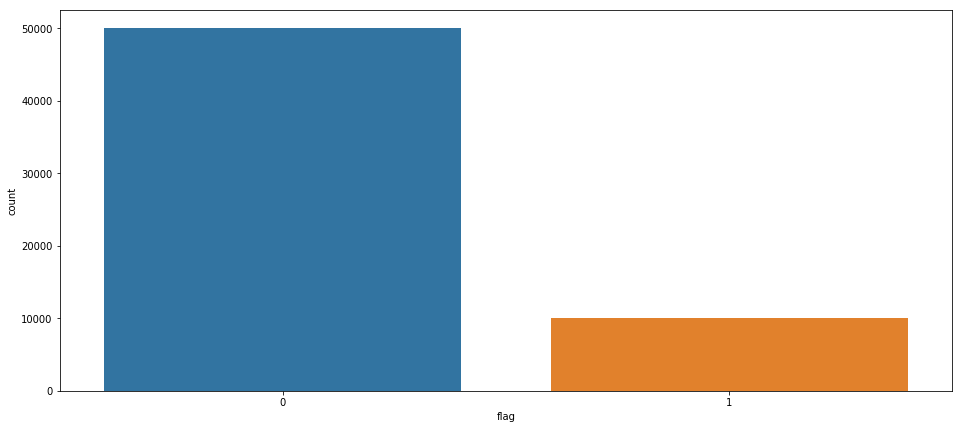

In [5]:
# class distribution
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("flag",data=spoofingData)

In [6]:
spoofingData.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0,0,0,128,0,103,209,19,0
1,254,81,0,0,0,60,0,0,0
2,0,0,0,0,0,8,9,165,0
3,10,128,0,255,19,128,2,3,0
4,0,0,0,0,0,0,0,0,0


In [7]:
spoofingData.tail()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
59995,1,69,96,255,107,0,0,0,1
59996,1,69,96,255,107,0,0,0,1
59997,1,69,96,255,107,0,0,0,1
59998,1,69,96,255,107,0,0,0,1
59999,1,69,96,255,107,0,0,0,1


In [8]:
#Create data = x
Cls_X = spoofingData.copy()

#create target = Y
Cls_y = Cls_X.flag

print('X shape before ')
print(Cls_X.shape)

#drop the response column from the x dataset
Cls_X.pop('flag') #drop 'flag'

print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(60000, 9)
X shape after 
(60000, 8)
Y shape after 
(60000,)


In [14]:
# set seed
seed = 1000
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(Cls_X, Cls_y, test_size = 0.3, random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 8)
(42000,)
(18000, 8)
(18000,)


In [15]:
# Create a model
LR = LogisticRegression()

In [16]:
# fit the model on the training data
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# get predicted probabilities
predict_prob = LR.predict_proba(X_test)[:,1]

In [18]:
# get the roc_auc_score
print("Fold ROC score is %f" % roc_auc_score(y_test, predict_prob))

Fold ROC score is 1.000000


In [19]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

randomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    randomPayload[col] = getRandomList(1000)

In [20]:
randomPayload.head()

,data0,data1,data2,data3,data4,data5,data6,data7
0,83,125,154,253,222,72,101,24
1,203,153,252,20,178,208,57,200
2,170,102,105,89,151,130,204,57
3,159,120,216,194,226,84,104,125
4,157,162,36,83,218,122,128,2


In [21]:
randomPayload.shape

(1000, 8)

In [22]:
randomPayload['flag'] = 1

In [23]:
randomPayload.shape

(1000, 9)

In [24]:
randomPayload.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,83,125,154,253,222,72,101,24,1
1,203,153,252,20,178,208,57,200,1
2,170,102,105,89,151,130,204,57,1
3,159,120,216,194,226,84,104,125,1
4,157,162,36,83,218,122,128,2,1


In [25]:
X_new = randomPayload.iloc[:, 0:8]

In [26]:
y_new = randomPayload.flag

In [27]:
goodPackets = spoofingData.loc[spoofingData.flag == 0]

In [28]:
badPackets = spoofingData.loc[spoofingData.flag == 1]

In [29]:
badPackets.shape

(10000, 9)

In [30]:
small_badPackets = badPackets.iloc[:1000,]

In [31]:
goodPackets.shape

(50000, 9)

In [32]:
small_goodPackets = goodPackets.iloc[:1000,]

In [33]:
small_goodPackets.shape

(1000, 9)

In [34]:
X_new_good = small_goodPackets.iloc[:, 0:8]
y_new_good = small_goodPackets.flag

In [35]:
X_new_bad = small_badPackets.iloc[:, 0:8]
y_new_bad = small_badPackets.flag

In [36]:
X_full = pd.concat([X_new, X_new_good, X_new_bad], axis = 0)
y_full = pd.concat([y_new, y_new_good, y_new_bad], axis = 0)

In [37]:
X_full.shape

(3000, 8)

In [38]:
y_full.shape

(3000,)

In [107]:
# get predicted probabilities
predict_prob = LR.predict_proba(X_full)[:,1]

In [109]:
# get the roc_auc_score
print("Fold ROC score is %f" % roc_auc_score(y_full, predict_prob))

Fold ROC score is 0.554657


In [ ]:
X_full = pd.concat([X_new, X_new_good, X_new_bad], axis = 0)
y_full = pd.concat([y_new, y_new_good, y_new_bad], axis = 0)

In [110]:
DT = DecisionTreeClassifier()

In [111]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
# get predicted probabilities
predict_prob = DT.predict_proba(X_test)[:,1]

In [113]:
# get the roc_auc_score
print("Fold ROC score is %f" % roc_auc_score(y_test, predict_prob))

Fold ROC score is 1.000000


In [114]:
# get predicted probabilities
predict_prob = DT.predict_proba(X_full)[:,1]

In [115]:
# get the roc_auc_score
print("Fold ROC score is %f" % roc_auc_score(y_full, predict_prob))

Fold ROC score is 0.750000


In [9]:
df_X = Cls_X
df_y = Cls_y

In [10]:
print(df_X.shape)
print(df_y.shape)

(60000, 8)
(60000,)


## Another approach

In [13]:
%%time
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("SVM_Kernel_linear", SVC(kernel='linear')))
models.append(("SVM_Kernel_linear_C1.5", SVC(C=1.5, kernel='linear')))

# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 1.000000
LogReg_C2: 1.000000
LogReg_C10: 1.000000
SVM: 1.000000
SVM_Kernel_linear: 1.000000
SVM_Kernel_linear_C1.5: 1.000000
CPU times: user 30.6 s, sys: 1.16 s, total: 31.8 s
Wall time: 32 s


In [39]:
df_X = X_full
df_y = y_full

In [40]:
print(df_X.shape)
print(df_y.shape)

(3000, 8)
(3000,)


In [ ]:
%%time
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("SVM_Kernel_linear", SVC(kernel='linear')))
models.append(("SVM_Kernel_linear_C1.5", SVC(C=1.5, kernel='linear')))

# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 0.964795
LogReg_C2: 0.963735
LogReg_C10: 0.962258
SVM: 0.986464


In [6]:
sum(y_test)

2979

In [7]:
sum(y_train)

7021

### KNN

In [13]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 217 ms, sys: 4.29 ms, total: 221 ms
Wall time: 223 ms


In [14]:
%%time
knn.score(X_test, y_test)

CPU times: user 698 ms, sys: 10.6 ms, total: 709 ms
Wall time: 722 ms


1.0

In [8]:
# prepare models
models = []

# linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [9]:
#Cls = spoofingData.copy()
Cls = spoofingData.copy()
target_data=Cls.flag
Cls.pop('flag')
train_data=Cls

In [10]:
# evaluate each model in turn
results = {}
oofs = {}
scoring = 'roc_auc'
for name, model in models:
    print("Training model :" + name)
    kfold = KFold(n_splits=10, random_state=7)
    oofs[name] = np.zeros(Cls.shape[0])
    cvscores = []
    for train_idx, test_idx in kfold.split(Cls):
        model.fit(train_data.loc[train_idx], target_data.loc[train_idx])
        oofs[name][test_idx] = model.predict_proba(train_data.loc[test_idx])[:,1]
        print("Fold ROC score is %f" % roc_auc_score(target_data[test_idx],oofs[name][test_idx]))
        cvscores.append(roc_auc_score(target_data[test_idx],oofs[name][test_idx]))
    results[name] = cvscores 

Training model :LR


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.